In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
df = pd.read_csv('ObesityDataSet.csv')

In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

Misal target kolom adalah 'NObeyesdad', fitur adalah semua selain itu

In [46]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']


Cek tipe data fitur, lakukan encoding jika ada fitur kategori
Misal jika fitur kategori : lakukan one-hot encoding

In [47]:
X_encoded = pd.get_dummies(X)


Split dataset 70% train - 30% test

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)


Definisikan model

In [49]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

Simpan hasil evaluasi tiap model

In [50]:
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}


Evaluasi tiap model

In [51]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    # Untuk multi-class gunakan average='macro'
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    results['Model'].append(name)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1-score'].append(f1)

    print(f'=== Evaluasi Model: {name} ===')
    print(f'Akurasi : {acc:.3f}')
    print(f'Presisi : {prec:.3f}')
    print(f'Recall  : {rec:.3f}')
    print(f'F1-Score: {f1:.3f}')

=== Evaluasi Model: Logistic Regression ===
Akurasi : 0.689
Presisi : 0.693
Recall  : 0.688
F1-Score: 0.681
=== Evaluasi Model: Decision Tree ===
Akurasi : 0.716
Presisi : 0.709
Recall  : 0.713
F1-Score: 0.709
=== Evaluasi Model: Random Forest ===
Akurasi : 0.754
Presisi : 0.781
Recall  : 0.755
F1-Score: 0.750


Confusion matrix

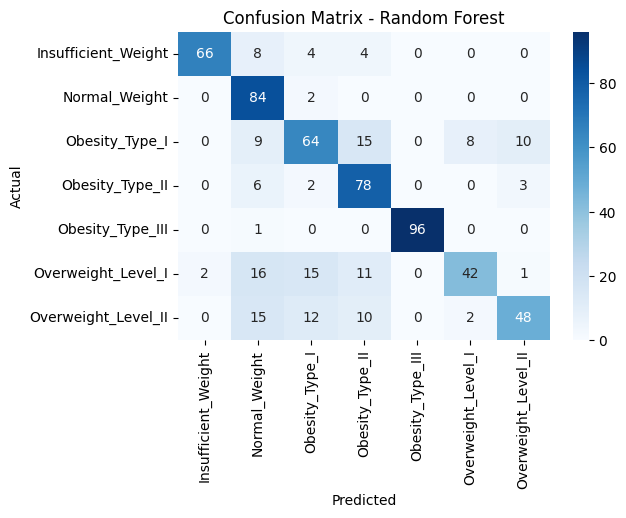

In [54]:

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Visualisasi perbandingan

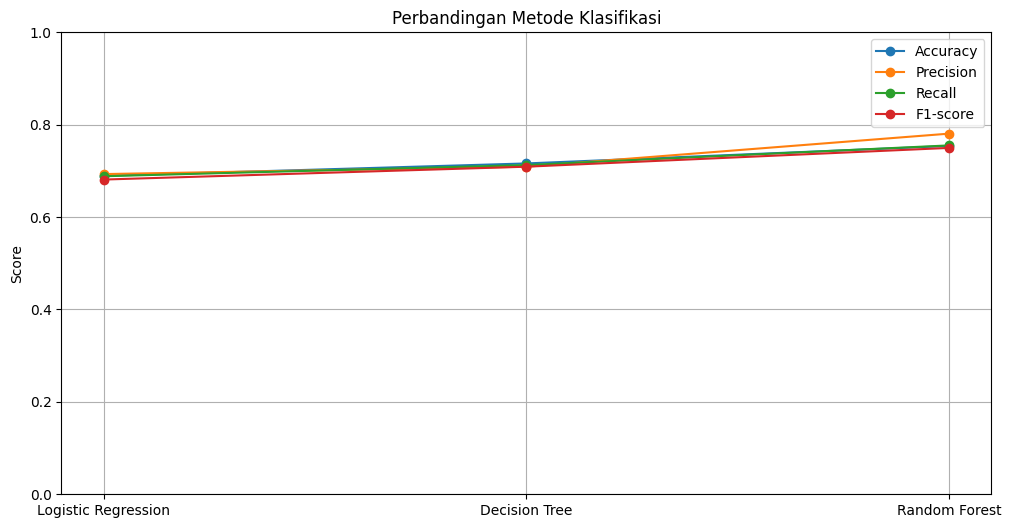

In [55]:
df_results = pd.DataFrame(results)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
plt.figure(figsize=(12, 6))
for metric in metrics:
    plt.plot(df_results['Model'], df_results[metric], marker='o', label=metric)
plt.title('Perbandingan Metode Klasifikasi')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


Kesimpulan

> - Dataset akan dibaca dan di-preprocessing dengan encoding fitur kategorikal.
- Dataset dibagi menjadi data latih dan uji (70:30).
- Tiga model klasifikasi dilatih dan diuji.
- Metrik evaluasi dihitung dengan average='macro' karena target bersifat multi kelas.
- Confusion matrix divisualisasikan untuk tiap model.
- Grafik perbandingan performa tiap metrik antar model ditampilkan.







